# <ins>E2 : Non-linear programming - Nicolas DESJONQUERES</ins>



# I - Code

In [145]:
# All the imports needed for the following code

import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import minimize
import math
import time

In [146]:
# Define the functions of the exercise

def f(x):
    return x**4 - 16 * x**3 - 45 * x**2 - 20 * x + 203

def d_f(x):
    return 4 * x**3 - 48 * x**2 - 90 * x - 20

def g(x):
    return -x**5 + 2 * x**4 - 23 * x**3 - 12 * x**2 - 36 * x

def d_g(x):
    return -5 * x**4 + 8 * x**3 - 69 * x**2 - 24 * x - 36

In [147]:
def plot_visual(function, interval, points, precision = 1000):
    # Define the x values of the points to plot
    x = np.linspace(interval[0], interval[1], precision)
    
    # Define the y values of the points to plot
    y = function(x)
    
    # Plot the function
    plt.plot(x, y)
    
    # Plot the points and lines to better show the convergence of the algorithm
    for p in points:
        plt.vlines(x = p, ymax = (max(y) if max(y) > function(p) else function(p)), ymin = (max(y) if max(y) < function(p) else function(p)))
        plt.plot(p, function(p), marker = "o")
        
    plt.show();

In [148]:
def line_search(func, d_func, lower, upper, error_tol, plot = False):
    # Define the interval needed to plot the graph
    interval = [lower, upper] 
    
    # If df/dx < 0, the function is convex and we need to inverse the switching with the intermediate...
    # ...value between the lower and upper bounds
    convex = (d_func(lower) < 0)    
                                    
    
    # Iterate until the desired error tolerance is reached
    while abs(upper - lower) > error_tol: 
        
        # Define the intermediate value of the search interval
        intermediate = (lower + upper) / 2 
        
        if plot:
            # Define points to plot on the graph
            points = [lower, intermediate, upper] 
            
            # Check if the interval between the points is significant for plotting
            if max(points) - min(points) > (interval[1] - interval[0]) / 1000: 
                plot_visual(func, interval, points)
        
        if d_func(intermediate) >= 0:
            if convex: upper = intermediate
            else: lower = intermediate
        else:
            if convex: lower = intermediate
            else: upper = intermediate
                
        # Return the estimated minimum point
    return (lower + upper) / 2 

def golden_search(func, a, b, error_tol, plot=False):
    # Define the interval needed to plot the graph
    interval = [a, b]
    
    # Calculate the golden ratio
    ratio = (math.sqrt(5) + 1) / 2
    
    # Iterate until the desired error tolerance is reached
    while abs(b - a) > error_tol: 
        # Calculate new points c and d using the golden ratio
        c = b - (b - a) / ratio 
        d = a + (b - a) / ratio
        
        # Update the interval based on the function values at c and d
        if func(c) < func(d):
            b = d
        else:
            a = c
            
        if plot: 
            # Define points to plot on the graph
            points = [a, b, c, d]
            
            # Check if the interval between the points is significant for plotting
            if max(points) - min(points) > (interval[1] - interval[0]) / 1000: 
                plot_visual(func, interval, points)
    
    # Return the estimated minimum point
    return (b + a) / 2

# II - Results of the algorithms

### • Results for f(x) = x<sup>4</sup> - 16x<sup>3</sup> - 45x<sup>4</sup> - 20x + 203

In [149]:
func = f
d_func = d_f
interval_min, interval_max = 2.5, 14
error_tolerance = 0.0000001

print("Result of the line search algorithm :", line_search(f, d_f, interval_min, interval_max, error_tolerance))
print("Result of the golden search algorithm :", golden_search(f, interval_min, interval_max, error_tolerance))
print("Result of the scipy minimize algorithm :", minimize(f, x0 = interval_min, bounds = [(interval_min, interval_max)]).x[0])

Result of the line search algorithm : 13.672398636117578
Result of the golden search algorithm : 13.672398533506932
Result of the scipy minimize algorithm : 13.672397904918505


### • Results for gx) = -x<sup>5</sup> + 2x<sup>4</sup> - 23x<sup>3</sup> - 12x<sup>2</sup> - 36x

In [150]:
func = g
d_func = d_g
interval_min, interval_max = 2, 3
error_tolerance = 0.0000001

print("Result of the line search algorithm :", line_search(f, d_f, interval_min, interval_max, error_tolerance))
print("Result of the golden search algorithm :", golden_search(f, interval_min, interval_max, error_tolerance))
print("Result of the scipy minimize algorithm :", minimize(f, x0 = interval_min, bounds = [(interval_min, interval_max)]).x[0])

Result of the line search algorithm : 2.9999999701976776
Result of the golden search algorithm : 2.9999999607905963
Result of the scipy minimize algorithm : 3.0


# III - Visualization of the convergence

### • Line search algorithm

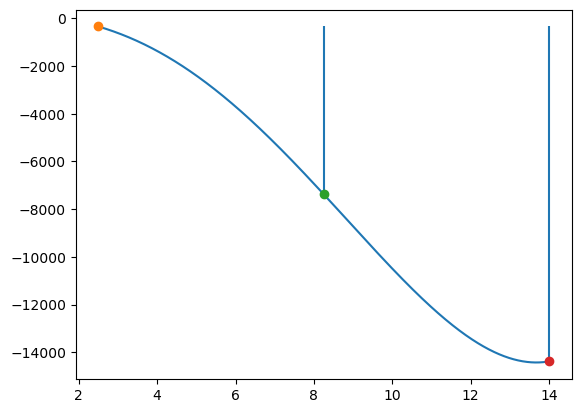

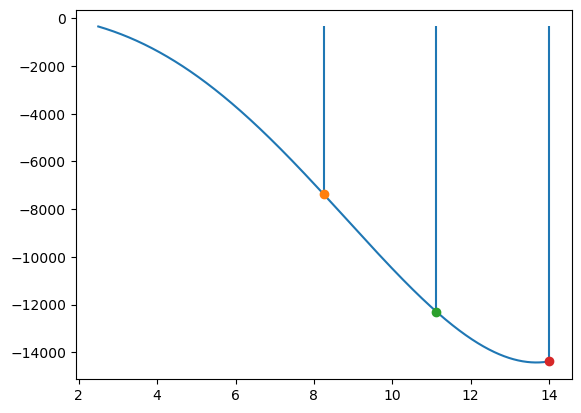

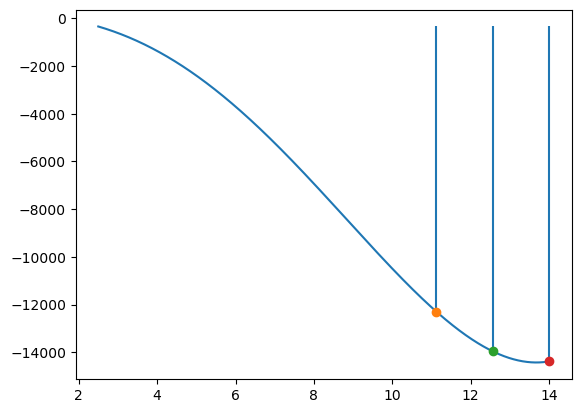

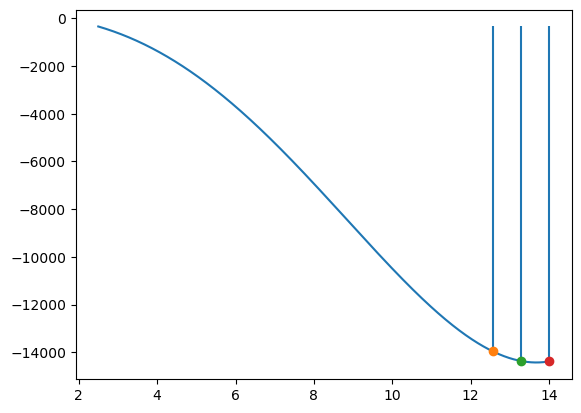

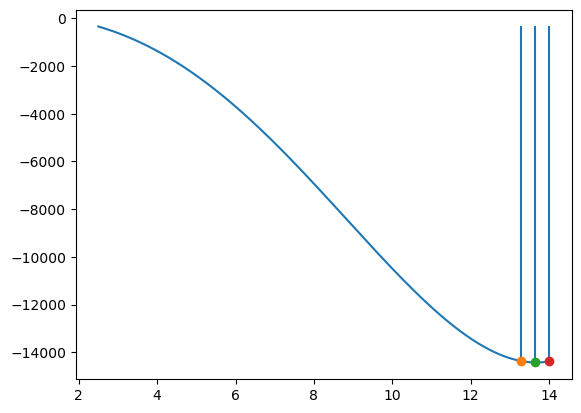

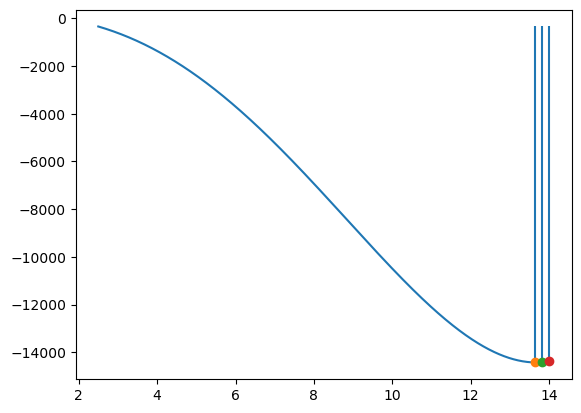

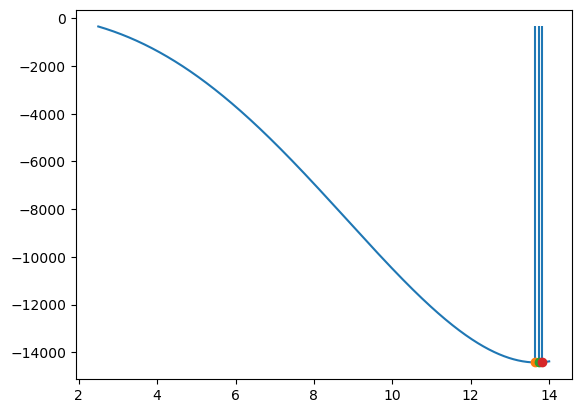

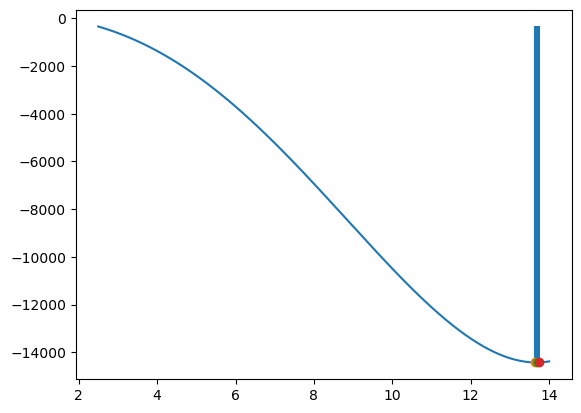

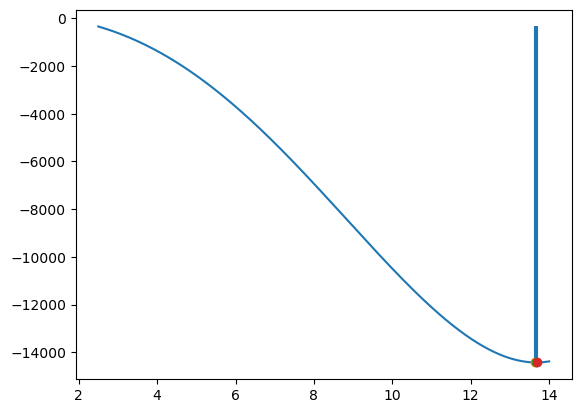

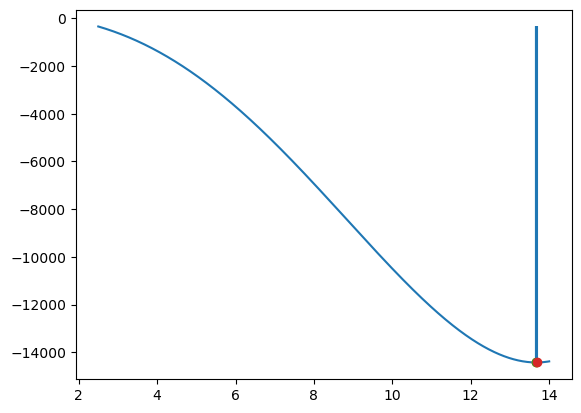

Final result : 13.672398636117578


In [151]:
print("Final result :", line_search(f, d_f, 2.5, 14, 0.0000001, True))

### • Golden Search algorithm

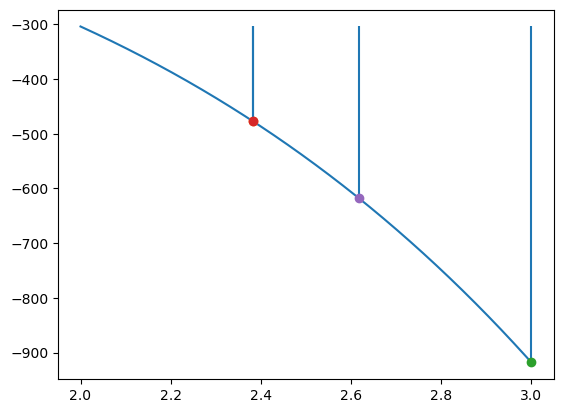

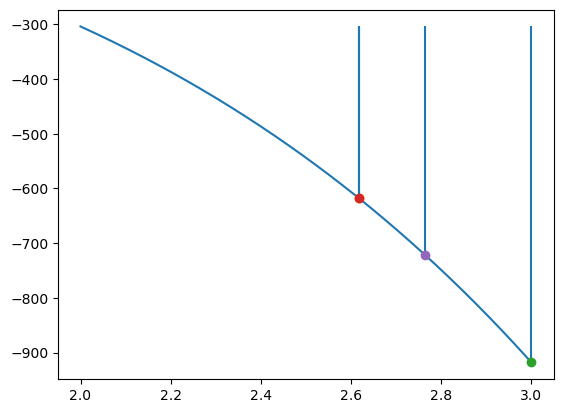

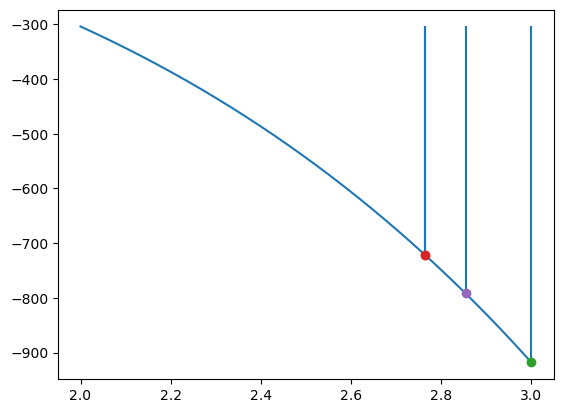

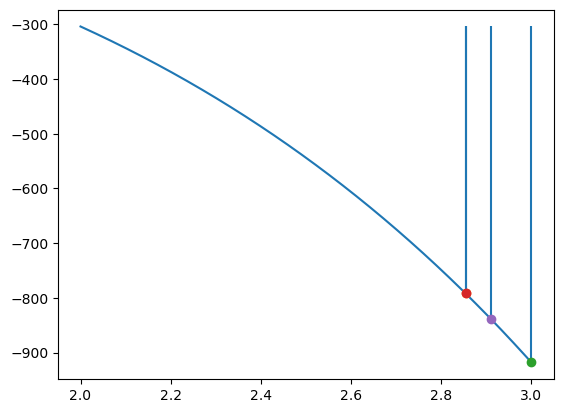

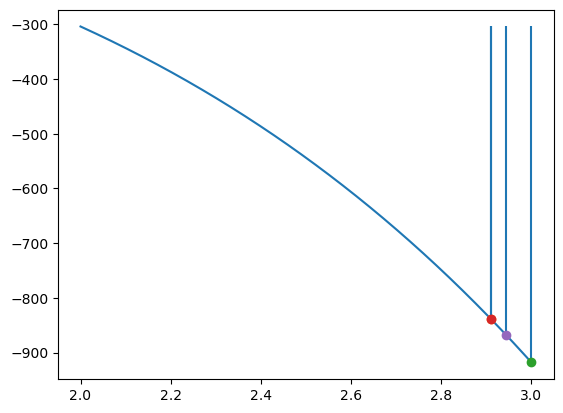

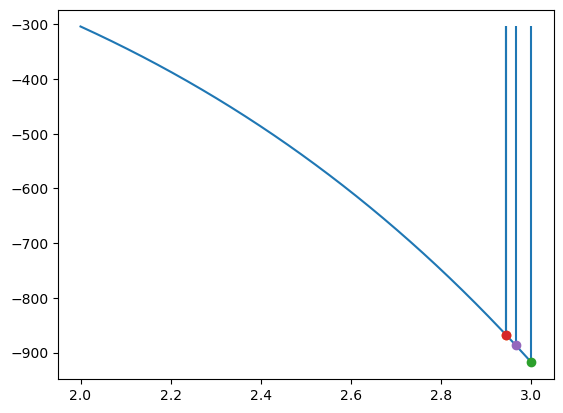

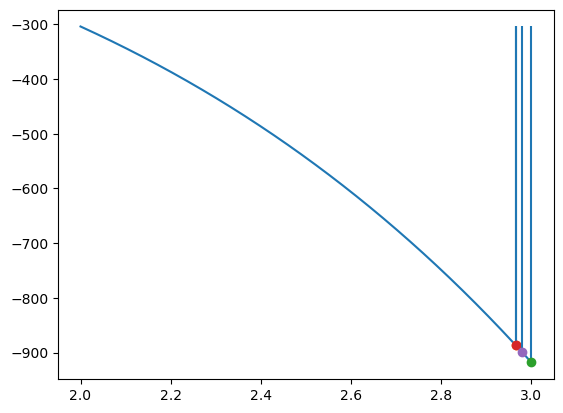

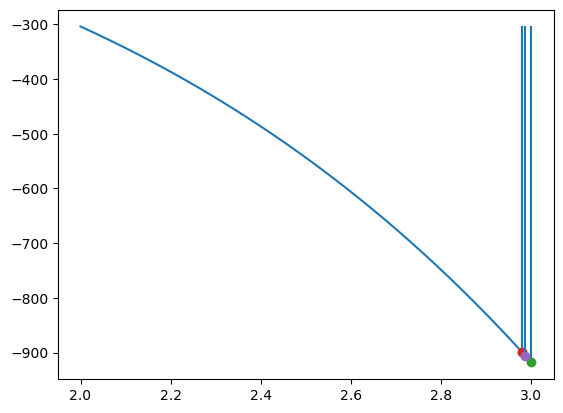

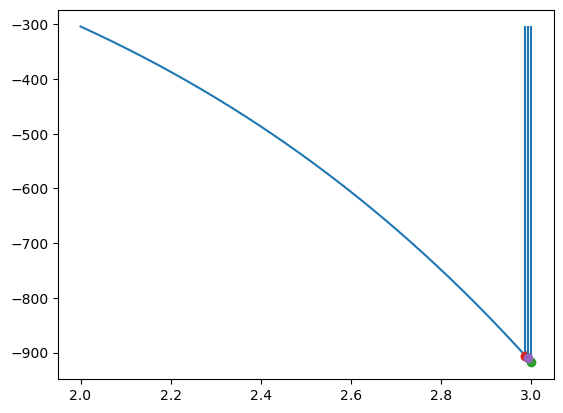

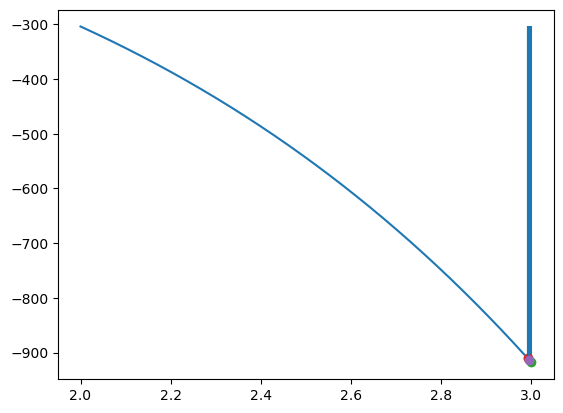

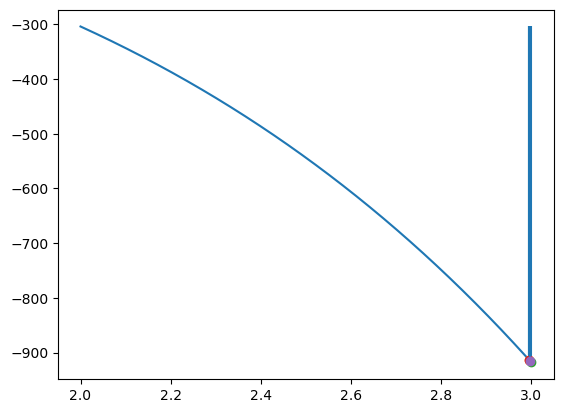

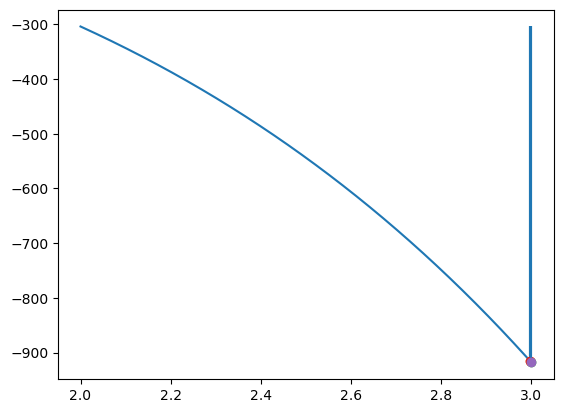

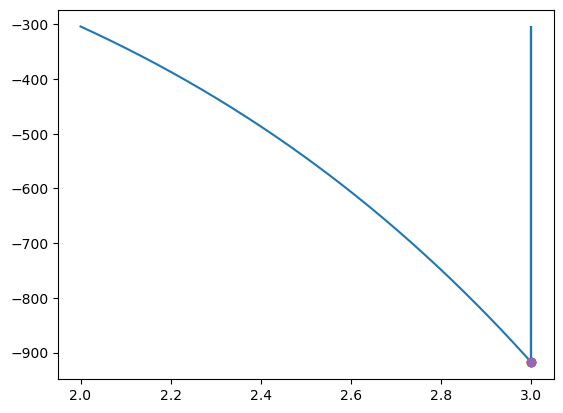

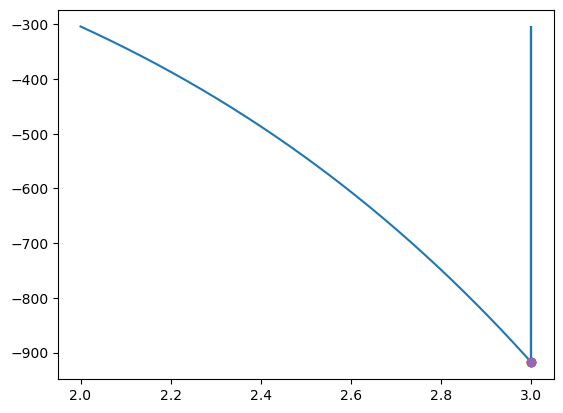

Final result : 2.9999999607905963


In [152]:
print("Final result :", golden_search(g, 2, 3, 0.0000001, True))